In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn import preprocessing # Used this normalizing technique but did not give good results

In [2]:
df = pd.read_excel('C:/Users/Jordan/Desktop/jupyter notebook/Correla/site3.xlsx')

In [3]:
df.head()

,Unnamed: 0,Site,Date,Vol,SiteNo
0,689,Site3,2019-04-02,9,2
1,690,Site3,2019-04-03,16,2
2,691,Site3,2019-04-04,14,2
3,692,Site3,2019-04-05,15,2
4,693,Site3,2019-04-06,13,2


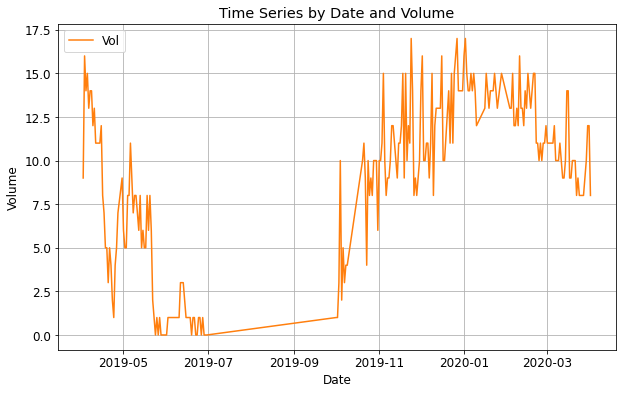

In [4]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.Date, df.Vol, color='tab:orange', label='Vol')

# Same as above
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
ax.set_title('Time Series by Date and Volume')
ax.grid(True)
ax.legend(loc='upper left');

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']= df['Date'].map(dt.datetime.toordinal)

In [6]:
df.head()

,Unnamed: 0,Site,Date,Vol,SiteNo
0,689,Site3,737151,9,2
1,690,Site3,737152,16,2
2,691,Site3,737153,14,2
3,692,Site3,737154,15,2
4,693,Site3,737155,13,2


# Regression

In [8]:
X = df[['Date']]
y = df['Vol']

scaler = StandardScaler() #Normalizing the Date
scaler.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#Building the LinearRegression Model
LRModel = LinearRegression()
LRModel.fit(X_train, y_train)
predictions = LRModel.predict(X_test)

In [10]:
#Linear Regrression
accuracy = metrics.r2_score(y_test, predictions)*100
MAE = mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)

print('Accuracy (R-Square):', accuracy)
print('Mean Absolute Error:',MAE)
print ('Mean Squared Error:',MSE)

Accuracy (R-Square): 31.325039199398496
Mean Absolute Error: 2.8520119777699158
Mean Squared Error: 12.844877716090846


In [11]:
print("Linear regression predictions for site 3:", predictions)

Linear regression predictions for site 3: [ 4.82906044  4.39705922 10.56507656 12.77308277 12.91708318 11.23707845
 12.36508163 10.46907629  4.46905943  9.53307366  5.38106199 12.22108122
 12.65308243 10.99707778  6.34106469 10.78107717 12.86908304  4.61305983
  5.95706361  9.86907461  5.09306118  4.7090601   9.41307333  5.02106098
 11.6450796  10.85307737  4.49305949  6.12506408  8.81307164 10.63707677
  9.48507353 12.41308176  4.85306051  5.741063    4.68506003  9.84507454
  9.12507252 11.90908034 10.10907528 12.96508331  6.17306422  9.62907393
  9.5090736   4.6370599  11.88508028  5.98106368 10.92507758  5.21306152
 11.35707879]


In [12]:
#Building the XGB model
xg_boost = xgb.XGBRegressor()
xg_boost.fit(X_train, y_train)
xgb_pred = xg_boost.predict(X_test)

predictions = xg_boost.predict(X_test)

In [13]:
#XG Boost
accuracy = metrics.r2_score(y_test, xgb_pred)*100
MAE = mean_absolute_error(y_test,xgb_pred)
MSE = metrics.mean_squared_error(y_test, xgb_pred)

print('Accuracy (R2-score):', accuracy)
print('Mean Absolute Error:',MAE)
print ('Mean Squared Error :',MSE)

Accuracy (R2-score): 79.79519503288654
Mean Absolute Error: 1.3943174262436069
Mean Squared Error : 3.779081138955149


In [14]:
print("XG Boost predictions for site 3:", xgb_pred)

XG Boost predictions for site 3: [ 4.0153675  12.074823   11.041128    9.000649    9.988297   13.181334
 11.846251   10.18164    12.922057   10.071227    7.9496775  11.828636
  9.096983   14.013696    0.07057223 14.079239    8.02174     8.029049
  2.7270575  11.263364    7.0787234   4.0281563  14.695209    7.981459
 14.775898   14.995448   11.031067    1.0072907   4.0304527  14.992217
 10.071227   10.03519     4.0153675   1.0063632   4.9693604  14.808016
  4.21337    14.838165   10.105945   11.906275    0.09119287 10.013819
 10.071227    4.9693604  12.210925    1.9762055  14.839205    7.9267626
 13.959098  ]
